In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns
sns.set_style('whitegrid')

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error



In [3]:
#leitura do dataset

df_housing = pd.read_csv('C:/California Housing Prices/housing.csv')
display(df_housing)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
#informações da base
df_housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Podemos perceber que a coluna ocean_proximity é uma variável qualitativa(object). Por isso, ela precisa ser convertida para dummy.


In [6]:
#visualizando os valores unicos da variável ocean_proximity
df_housing['ocean_proximity'].unique()


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [17]:
# convertendo para dummy

df_dummy = pd.get_dummies(df_housing['ocean_proximity'])

In [18]:
# juntando o dataset agora com a coluna object removida e acrescentado as colunas dummy
#axis = 1 para pegar a coluna

df_housing2 = pd.concat([df_housing.drop('ocean_proximity', axis = 1), df_dummy], axis = 1)
df_housing2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [19]:
# reorganizando para deixar nossa variável depenente na última posição das colunas


df_housing2 = df_housing2[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN', 'median_house_value']]

df_housing2



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0,84700.0


In [20]:
# Verificação de dados ausentes

df_housing2.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
median_house_value      0
dtype: int64

In [21]:
#verificando se a quantidade de dados ausentes é relevante

(207 / len(df_housing2)) * 100

1.002906976744186

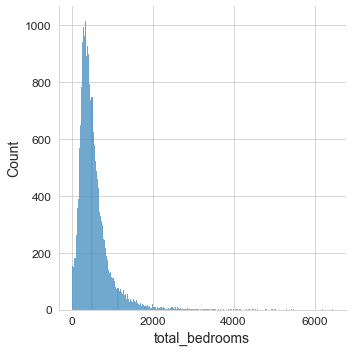

In [22]:
#visualizando 
sns.displot(df_housing2['total_bedrooms'])

In [23]:
# diferença entre a média e a mediana para analisar a presença de outlier
df_housing2['total_bedrooms'].mean(), df_housing2['total_bedrooms'].median()

(537.8705525375618, 435.0)

In [24]:
# Realização da remoção dos dados ausentes passando de 20640 para 20433 linhas
df_housing3=df_housing2.dropna()
df_housing3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0,84700.0


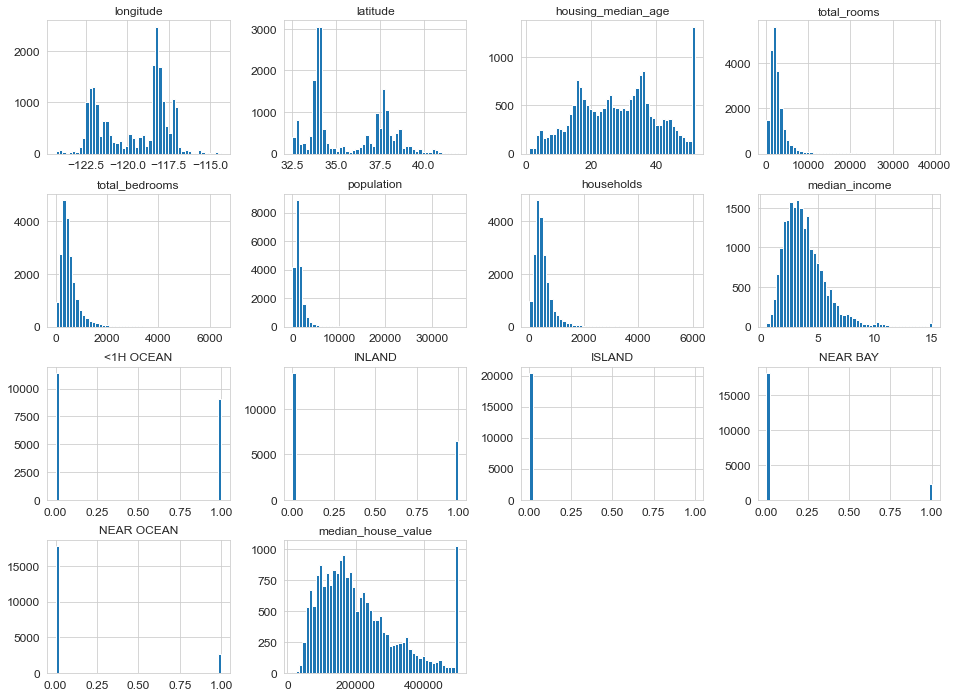

In [25]:
# visulizar se existe outros outliers

df_housing3.hist(figsize = (16, 12), bins = 50);



In [27]:
# visualizando os dados estatíscos 

df_housing3.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,0.442128,0.317917,0.000245,0.111095,0.128615,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,0.496652,0.465678,0.015641,0.314257,0.334782,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,0.000000,0.000000,0.000000,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,0.000000,0.000000,0.000000,0.000000,0.000000,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,0.000000,0.000000,0.000000,0.000000,0.000000,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,1.000000,1.000000,0.000000,0.000000,0.000000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,1.000000,1.000000,1.000000,1.000000,1.000000,500001.000000


<AxesSubplot:>

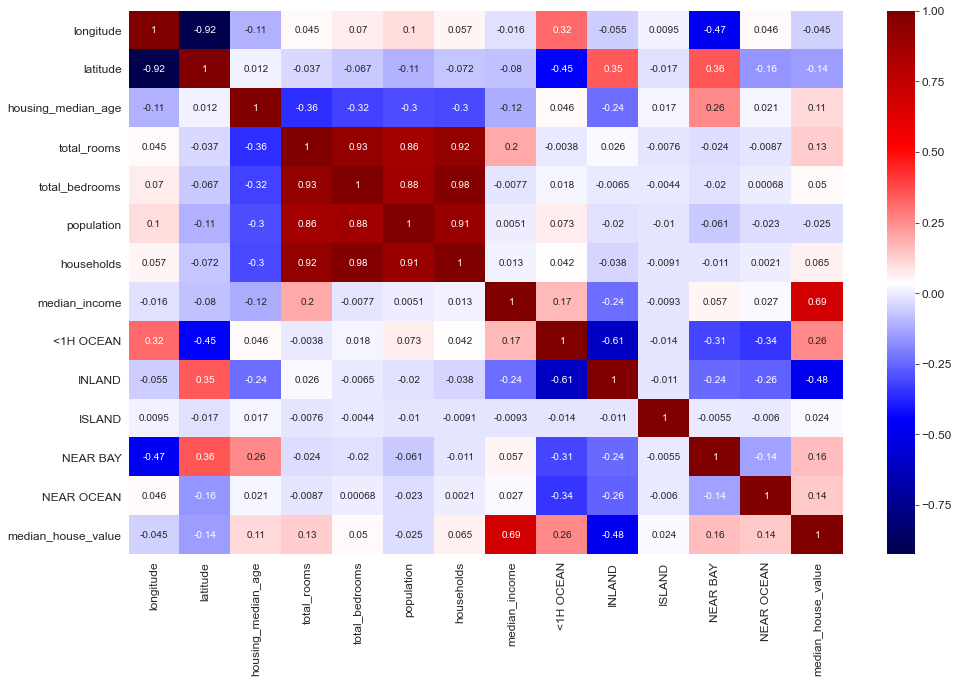

In [29]:
# Correlação da variáveis

plt.figure(figsize = (16,10))
sns.heatmap(df_housing3.corr(), annot = True, cmap = 'seismic')



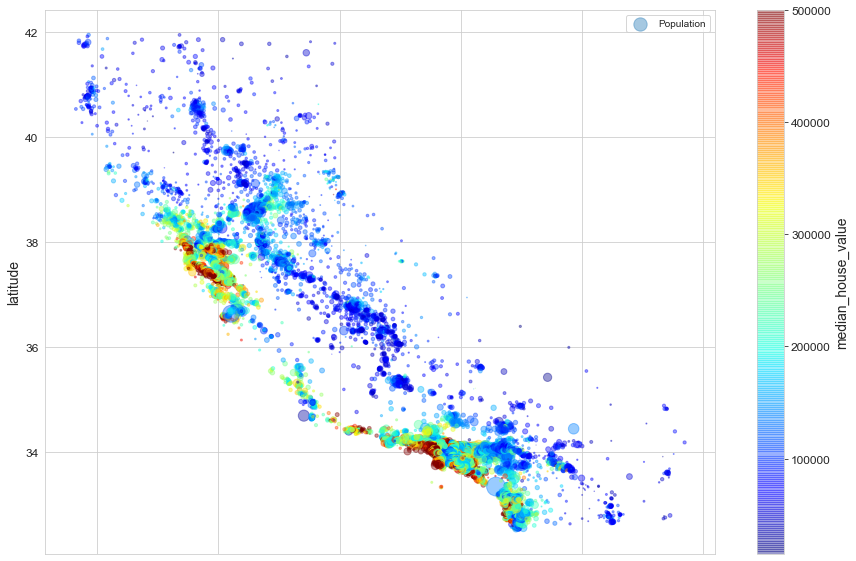

In [30]:
# Grafico com as posicoes geograficas das casas e marcadores com 40% da cor e modulados pelo 'population'/100 e 
#coloridos de acordo com o valor das casas

df_housing3.plot(kind='scatter', x='longitude', y='latitude',alpha=0.4, # posicao geografica
                s=df_housing3['population']/100, label='Population', figsize=(15,10), # tamanho do marcado de acordo com a media da populacao no quarteirao
                c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True) # cor do marcado de acordo com o valor das casas
plt.legend()

## Machine learning



### Realização da regressão linear

In [45]:
#tiramos a variável dependente median_house_value
X = df_housing3.drop(['median_house_value'], axis = 1)
y = df_housing3['median_house_value']


In [46]:
#treino 70% e teste 30% de forma aleatória
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [47]:
# realizando a regressão linear
reg = LinearRegression()
reg.fit(X_train, y_train)

# predição 
y_pred= reg.predict(X_test)

In [48]:
#verificando o percentual da explicação
reg.score(X_test,y_test)


0.6412833668690334

In [49]:
# usando o R2 para visualizar o percentual de explicação
# compara os valores da previsão com a valor real o y_test, y_pred
print(f'R2: {r2_score(y_test, y_pred)}')

#erro quadrado médio
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R2: 0.6412833668690334
RMSE: 68862.2058223752


In [50]:
# testando em outros modelos

modelos = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(),
    'ElasticNet': ElasticNet(),
    'SVR': SVR(),
    'Ridge': Ridge(),
    'BayesianRidge': BayesianRidge()
}

In [51]:
modelo_rmse = []
modelo_r2 = []
modelo_nomes = []

for nome, modelo in modelos.items():
    fit_modelo = modelo.fit(X_train, y_train)
    predicao = fit_modelo.predict(X_test)
    
    modelo_r2.append(r2_score(y_test, predicao))
    modelo_rmse.append(np.sqrt(mean_squared_error(y_test, predicao)))
    modelo_nomes.append(nome)
    
    resultado_final = pd.DataFrame([modelo_nomes, modelo_r2, modelo_rmse]).T
    resultado_final = resultado_final.rename(columns={0:'Modelo', 1: 'R2', 2:'RMSE'}).sort_values(by = 'RMSE')
    
resultado_final

,Modelo,R2,RMSE
1,RandomForestRegressor,0.825521,48026.063742
5,BayesianRidge,0.641291,68861.499977
4,Ridge,0.641285,68862.025559
0,LinearRegression,0.641283,68862.205822
2,ElasticNet,0.614252,71409.705963
3,SVR,-0.058162,118271.814824
